<link rel='stylesheet' href='../assets/css/main.css'/>

[<< back to main index](../README.md)

# Linear Regression in Sklearn 

### Overview
Instructor to demo this on screen.
 
### Builds on
None

### Run time
approx. 20-30 minutes

### Notes

sklearn has a class called Linear Regression that can be used to do simple linear regression models.

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


## Example : Tips
Here is our tip data.  This shows 10 observations of bill with tip amounts.

| bill | tip | 
|------|-----| 
| 50   | 12  | 
| 30   | 7   | 
| 60   | 13  | 
| 40   | 8   | 
| 65   | 15  | 
| 20   | 5   | 
| 10   | 2   | 
| 15   | 2   | 
| 25   | 3   | 
| 35   | 4   | 

## Step 1: Let's create a Pandas dataframe with the data


In [2]:
tip_data = pd.DataFrame({'bill' : [50.00, 30.00, 60.00, 40.00, 65.00, 20.00, 10.00, 15.00, 25.00, 35.00],
              'tip' : [12.00, 7.00, 13.00, 8.00, 15.00, 5.00, 2.00, 2.00, 3.00, 4.00]
             })

tip_data


,bill,tip
0,50.0,12.0
1,30.0,7.0
2,60.0,13.0
3,40.0,8.0
4,65.0,15.0
5,20.0,5.0
6,10.0,2.0
7,15.0,2.0
8,25.0,3.0
9,35.0,4.0


## Step 2: Let's do a quick plot of the data

Let us use matplotlib to do a quick scatter plot of the data.

**=>TODO: plot the bill (X-axis), versus the tip (Y-axis)**

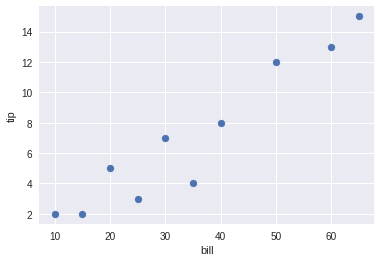

In [3]:
plt.scatter(tip_data.bill, tip_data.tip)
plt.ylabel('tip')
plt.xlabel('bill')
plt.show()


## Step 3: Run Linear Regression in Sklearn

Let's run our linear regression.  To do this we need to run call the LinearRegression Classs

In [4]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(tip_data.bill.values.reshape(10,1), tip_data.tip.values.reshape(10,1))

                  
# The coefficients
print('Coefficients: \n', regr.coef_)

intercept = regr.intercept_  # This is the intercept
slope = regr.coef_[0] #This is the slope

Coefficients: 
 [[0.24285714]]


In [5]:
tip_data.tip

0    12.0
1     7.0
2    13.0
3     8.0
4    15.0
5     5.0
6     2.0
7     2.0
8     3.0
9     4.0
Name: tip, dtype: float64

## Step 7: Plot the fit line (abline)

**=>TODO: Do a scatterplot of bill versus tip **
**=>TODO: rename variable "tip" as "label" **

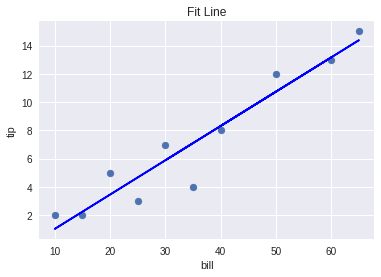

In [6]:
# Create a list of values in the best fit line
abline_values = [slope * i + intercept for i in tip_data.bill]

# Plot the best fit line over the actual values
plt.scatter(tip_data.bill, tip_data.tip)
plt.plot(tip_data.bill, abline_values, 'b')
plt.ylabel('tip')
plt.xlabel('bill')
plt.title("Fit Line")
plt.show()

In [7]:
# Make predictions using the testing set
y_pred = regr.predict(tip_data.bill.values.reshape(10,1))
y_test = tip_data.tip.values.reshape(10,1)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [[0.24285714]]
Mean squared error: 1.91
Variance score: 0.91
Coefficients: 
 [[0.24285714]]
Mean squared error: 1.91
Variance score: 0.91


## Step 8: Print out the Outputs

Here is a sample output:

## Step 9: Plot the residuals

Residuals are the error, or difference between the model predicted and model actual.  We'd like these to be as small as possible, with residuals roughly balanced.   We don't want a model that consistently predicts values too high or too low.

**=>TODO: do a plot of the bill (x-value) versus residuals (y-value) **

In [0]:
resid = (slope * tip_data.bill + intercept) - tip_data.tip

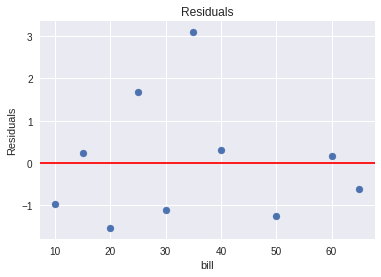

In [9]:
plt.scatter(tip_data.bill, resid)
plt.axhline(y=0, color='r', linestyle='-')  # horizon
plt.ylabel('Residuals')
plt.xlabel('bill')
plt.title("Residuals")
plt.show()




## Step 10 : Identify Coefficients

### Intercept and Slope
We can see them from output

Coefficients:
            Estimate 
(Intercept) -0.8217112049846651
bill        0.226334605857

- **Slope** (of line) : ** 0.226334605857**
- **Intercept** (where line meets Y-axis) : **-0.8217112049846651**  (below zero line)

We can also get these programatically.  
If `tip = a * amount + b`

In [10]:

intercept = regr.intercept_  # This is the intercept
slope = regr.coef_[0] #This is the slope

# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(slope))
print("Intercept: %s" % str(intercept))

a = slope
b = intercept


Coefficients: [0.24285714]
Intercept: [-1.4]


**==>  Question : Does bill amount influence tip amount? (are they strongly linked?) **


## Coefficient of Determination (r&sup2;)

In [11]:
# coefficient.of.determination (r^2) 
rsquared = r2_score(y_test, y_pred)
rsquared

0.9067140765530224

**==>  Question : What does r&sup2; tells us? **

## Step 11: Calculate tip for $100 bill

**=>TODO: perform the calculation for tip_for_100 using a,b coefficients **

In [12]:
tip_for_100 = a * 100 + b   
print(tip_for_100)


[22.88571429]


## Step 12: Add a estimated_tip column to pandas dataframe

**=>TODO: create a new pandas column called est_tip **

In [14]:
tip_data['est_tip'] =  100 # How to do this?

tip_data['est_tip'] = regr.predict(tip_data.bill.values.reshape(10,1)) #Another way to do it
tip_data

,bill,tip,est_tip
0,50.0,12.0,10.742857
1,30.0,7.0,5.885714
2,60.0,13.0,13.171429
3,40.0,8.0,8.314286
4,65.0,15.0,14.385714
5,20.0,5.0,3.457143
6,10.0,2.0,1.028571
7,15.0,2.0,2.242857
8,25.0,3.0,4.671429
9,35.0,4.0,7.100000


## Step 13: Perform a prediction


Let's try to run a prediction on some data: $45.00, $55.00, and $65.00 


**=>TODO: use model to transform dataframe with feature vectors to make predictions **

In [15]:
test_data_pd = pd.DataFrame({'bill' : [45., 55., 65.,]
             })

test_data_pd['predicted_tip'] = regr.predict(test_data_pd.bill.values.reshape(3,1))



test_data_pd

,bill,predicted_tip
0,45.0,9.528571
1,55.0,11.957143
2,65.0,14.385714
